# Tutorial 3

## 1. Backpropagation (without Python)

Take a look at the following simple neural network.

<center>
<img src="https://raw.githubusercontent.com/SvenKlaassen/DL-Lecture-Figures/main/figures/simple_nn.png" alt="Simple Network" style="width: 800px;"/><br>
<b>Figure 1:</b> Simple Neural Network.</center>

Here, $\sigma_1$ and $\sigma_2$ are ReLU. Further the weights are set to

$$ v_1=\begin{pmatrix} 1\\2 \end{pmatrix}, v_2=\begin{pmatrix} -3\\4 \end{pmatrix} \text{ and }w=\begin{pmatrix} -2\\1\\0.5 \end{pmatrix}.$$

Assume you observe the features $x=(1,1)^T$ with outcome $y=4$.

* Calculate one forward pass through the model to obtain the predicted value $\hat{y}$. What is the corresponding squared loss?

* Perform a backward pass through the model and calculate the gradient of the loss function with respect to all parameters of the model.

* (Optional) Validate your results using python.

In [12]:
import torch

v1 = torch.tensor([1, 2])
v2 = torch.tensor([-3, 4])
w = torch.tensor([-2.0, 1.0, 0.5])

sigma_1: 3
sigma_2: 1
w^T sigma(x): -4.5


## 2. Neural Network

### Dataset

Start by importing the necessary modules.

In [1]:
import torch
import torchvision
import torchvision.datasets as datasets

Next, we load the famous [MNIST](http://yann.lecun.com/exdb/mnist/) dataset.

In [2]:
mnist_train = datasets.MNIST(root='./data', train=True, download=True,   transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))
mnist_test = datasets.MNIST(root='./data', train=False, download=True,   transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])) #normalize on the training dataset

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.47MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 255kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 2.19MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 996kB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



The dataset contains $70,000$ observations of handwritten digits with corresponding labels. Here, the data is transformed to a tensor and normalized ($0.1307$ and $0.3081$ are the mean and the standard deviation on the training set).

In [3]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [20]:
data_container = [i for i in range (1000)]

In [23]:
batch_size = 32 

i = 0
epochs = 5

for epoch in range (epochs):
    i = 0
    while i < 5:
        batched_data = data_container[i*batch_size:(i+1)*batch_size]
        print("\n")
        print(batched_data)
        print("\n")
        i += 1





[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]




[32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]




[64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]




[96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]




[128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159]




[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]




[32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]




[64, 65, 66, 67, 68, 69, 70

* Construct a `DataLoader` for the training set by using `torch.utils.data.DataLoader` directly (batch sizes of $64$ and $128$) and set a seed for the random number generator. Additionally, create an `DataLoader` for the test set.

In [24]:
train_loader = torch.utils.data.DataLoader(mnist_train,10,shuffle=True)

In [28]:
i = 0
for batch in iter (train_loader): 
    while i < 3:
        print(len(batch))
        i +=1

2
2
2


In [30]:
next(iter(train_loader))

[tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           ...,
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],
 
 
         [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           ...,
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],
 
 
         [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
       

In [29]:
example = (train_loader) #iter zum interierbare Objekt machen

* Take a look at the data examples by iterating the `DataLoader` once over the training set. Save the batch (e.g. as `example`).

**Digression:** Another helpful built-in function of Python is `enumerate`. Try looping over the following list using `enumerate`.

In [5]:
list = ['Item 1', 'Item 2', 'Item 3']

In [6]:
for counter, item in enumerate(list):
    print(counter, item)

0 Item 1
1 Item 2
2 Item 3


For our purposes, `enumerate` can be used on the `DataLoader`.

In [7]:
examples = enumerate(train_loader)
batch_idx, (example_features, example_labels) = next(examples)

The following code chunk displays the features as an imange and the corresponding labels.

/var/folders/7p/hbft17ts46dckcqpv35r3z6m0000gn/T/ipykernel_6312/595597796.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


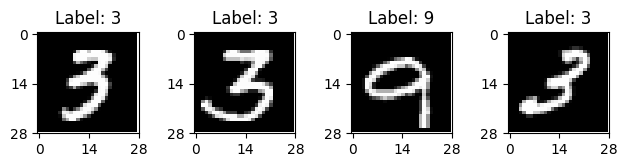

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.tight_layout()
    plt.imshow(example_features[i][0], cmap='gray', interpolation='none')
    plt.title("Label: {}".format(example_labels[i]))
    plt.xticks([0,14,28])
    plt.yticks([0,14,28])
plt.show()

## Implementing a Neural Network

Import the `torch.nn` and construct a sequential neural network (choose your own structure; maybe not too large) for classification. Starting with the `nn.Flatten` layer migth be very helpful.

* Use the `CrossEntropyLoss` (`reduction='sum'` might be helpful later) and `torch.optim.Adam`for optimization.
* Initialize all weights of your network from a normal distribution with standard deviation $0.01$.
* Before we start training our network, use our `train_loader` and `test_loader` to evaluate the loss on our training and testing data (this might take a while).
* Specify the number of epochs to $1$ and start training your network. Afterwards evaluate the loss.
* We would like to get more information printed during the training process. Increase the number of epochs to $5$ and every $50$ batches print the current epoch and loss on the batch (you can add the number of used observations in the epoch as well). Further add the end of each epoch evaluate the loss on the training set. Before starting reinitialize the weights randomly.
* Next, take a look at a specific predicition on your example batch from above and compare the predictions to the corresponding labels.
* Use this to evaluate the share of accuracy (share correctly predicted labels) on the test set at each epoch. Additionally, log all the printed losses. Again, before starting reinitialize the weights randomly.
* Plot the logged losses in a suitable plot.

Neural network modules as well as optimizers have the ability to save and load their internal state using `.state_dict()`.
`load_state_dict(state_dict)`. See [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html) for saving and loading models. What does the dictionary save?

### GPUs
Now, use GPUs for training your model.

In [32]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")